<a href="https://colab.research.google.com/github/pravincoder/Fundamentals_tensorflow/blob/main/Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression 
### Whats to cover in this notebook?
* Architecture of neural network regression model.
* Input/Output shapes of regression model.
* Creating custom data to view and fit. 
* (Modeling) Creating a model,compiling,fitting and evaluating the model.
* Different evaluation method
* (IMP) Saving and loading a model

# Introduction to Regression with Neural Network in Tensorflow

 The simple defination is prediction of the numerial value based on various combinations of variables (both relational and non-realtional) .



In [1]:
# import tensorflow , numpy,matplotlib.pyplot
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create features
X = np.array([-7.0,-4.0,-1.0,2.,3.,4.,6.,8.,11.0,14.])
Y = np.array([2.0,5.0,8.0,11.0,12.,13.,15.,17.,20.,23.])

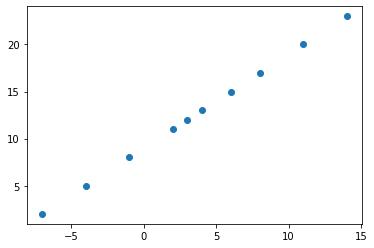

In [3]:
# Visual the data
plt.scatter(X,Y)

In [4]:
Y == X+9

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

# Input and Output Shape

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([934000])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([934000], dtype=int32)>)

In [6]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape,output_shape

((), ())

In [7]:
X[0].ndim # Given input is a numpy array not a tensor

0

In [8]:
X,Y

(array([-7., -4., -1.,  2.,  3.,  4.,  6.,  8., 11., 14.]),
 array([ 2.,  5.,  8., 11., 12., 13., 15., 17., 20., 23.]))

In [9]:
# Turn our Numpy array to Tensor
X= tf.constant(X)
Y= tf.constant(Y)

X = tf.cast(X,dtype=tf.float32)
Y = tf.cast(Y,dtype=tf.float32)
X.shape,Y.shape

(TensorShape([10]), TensorShape([10]))

# Steps in Modeling with Tensorflow

* **Creating a Model** - define the input and output layers, as well as the hidden layers of the deep learning model.
* **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the Optimizer(tells our model how to improve in reading the patterns) and evaluation metrics (what we can use to interpret the preformance of our model).
* **Fitting a Model** - letting the model try to find the pattern btw Features and Label(X & Y).

In [10]:
# Set Random Seed
tf.random.set_seed(42)

# Create a model using Sequential API
model= tf.keras.Sequential([ tf.keras.layers.Dense(1,input_shape=(1,))])

# Compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model
model.fit(X,Y,epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 451ms/step - loss: 8.2220 - mae: 8.2220
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 8.0824 - mae: 8.0824
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 7.9428 - mae: 7.9428
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 7.8032 - mae: 7.8032
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 7.6636 - mae: 7.6636


In [11]:
# try and make prediction
model.predict([17.0])
# output should be 17+9=26 

1/1 [==============================] - 0s 256ms/step


array([[23.783852]], dtype=float32)

# Improve our Model

We can improve our model , by altering the steps we took to create a model

* **Creating the Model** - we might add more layers,increase the number of hidden units (all called neurons) within each of the hidden layers,change the activation function of each layer

* **Compiling a Model** - we should try changing the optimization function or perhaps the **learning rate** of the Optimization function.

* **Fitting a Model** - we might fit the model for more **epochs** (leave it training for longer)  or on more data. 

In [58]:
# Just increasing the epochs to 100 that is 10x and checking the model prediction
# Create a model using Sequential API
model2= tf.keras.Sequential([ tf.keras.layers.Dense(1,input_shape=(1,))])

# Compile the model
model2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model
model2.fit(X,Y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 290ms/step - loss: 13.3920 - mae: 13.3920
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.2524 - mae: 13.2524
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 13.1128 - mae: 13.1128
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 12.9732 - mae: 12.9732
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8336 - mae: 12.8336
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 12.6940 - mae: 12.6940
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 12.5544 - mae: 12.5544
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 12.4148 - mae: 12.4148
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 12.2752 - mae: 12.2752
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 12.1356 - mae: 12.1356
Epoch 11/100
1/1 [==============================] - 0s 8m

In [59]:
# Check the prediction of model2
model2.predict([17.0])

1/1 [==============================] - 0s 63ms/step


array([[30.525969]], dtype=float32)

In [69]:
# improved Model by reading the above points
# Only increased the dense layers and neurons with increase in epochs
# Set Random Seed
tf.random.set_seed(42)

# Create a model using Sequential API
model3= tf.keras.Sequential([ tf.keras.layers.Dense(1,input_shape=(1,)),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)])

# Compile the model
model3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model
model3.fit(X,Y,epochs=150)


Epoch 1/150
1/1 [==============================] - 0s 492ms/step - loss: 12.3832 - mae: 12.3832
Epoch 2/150
1/1 [==============================] - 0s 9ms/step - loss: 12.1514 - mae: 12.1514
Epoch 3/150
1/1 [==============================] - 0s 9ms/step - loss: 11.9332 - mae: 11.9332
Epoch 4/150
1/1 [==============================] - 0s 10ms/step - loss: 11.7055 - mae: 11.7055
Epoch 5/150
1/1 [==============================] - 0s 9ms/step - loss: 11.4572 - mae: 11.4572
Epoch 6/150
1/1 [==============================] - 0s 8ms/step - loss: 11.1806 - mae: 11.1806
Epoch 7/150
1/1 [==============================] - 0s 8ms/step - loss: 10.8620 - mae: 10.8620
Epoch 8/150
1/1 [==============================] - 0s 9ms/step - loss: 10.4914 - mae: 10.4914
Epoch 9/150
1/1 [==============================] - 0s 10ms/step - loss: 10.0505 - mae: 10.0505
Epoch 10/150
1/1 [==============================] - 0s 10ms/step - loss: 9.5249 - mae: 9.5249
Epoch 11/150
1/1 [==============================] - 0s 9

In [70]:
# try and make prediction with model3
model3.predict([17.0])
# output should be 17+9=26 

1/1 [==============================] - 0s 100ms/step


array([[24.443985]], dtype=float32)

In [73]:
# increased the epochs
# increased the dense layer (10,20,10)
# Changed the optimizer to experimental.AdamW check more optimizer on tf/optimizers
tf.random.set_seed(42)

# Create a model using Sequential API
model4= tf.keras.Sequential([ tf.keras.layers.Dense(1,input_shape=(1,)),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)])

# Compile the model
model4.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.experimental.AdamW(),
              metrics=['mae'])

# Fit the model
model4.fit(X,Y,epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 12.6447 - mae: 12.6447
Epoch 2/300
1/1 [==============================] - 0s 9ms/step - loss: 12.6260 - mae: 12.6260
Epoch 3/300
1/1 [==============================] - 0s 11ms/step - loss: 12.6075 - mae: 12.6075
Epoch 4/300
1/1 [==============================] - 0s 10ms/step - loss: 12.5892 - mae: 12.5892
Epoch 5/300
1/1 [==============================] - 0s 9ms/step - loss: 12.5711 - mae: 12.5711
Epoch 6/300
1/1 [==============================] - 0s 9ms/step - loss: 12.5535 - mae: 12.5535
Epoch 7/300
1/1 [==============================] - 0s 10ms/step - loss: 12.5362 - mae: 12.5362
Epoch 8/300
1/1 [==============================] - 0s 9ms/step - loss: 12.5193 - mae: 12.5193
Epoch 9/300
1/1 [==============================] - 0s 9ms/step - loss: 12.5028 - mae: 12.5028
Epoch 10/300
1/1 [==============================] - 0s 12ms/step - loss: 12.4869 - mae: 12.4869
Epoch 11/300
1/1 [==============================] - 0s 8

In [82]:
# make Predictions
print(model4.predict([17.0]))
# 17+9 =26 perfect model with loss=0.09 
# here is the most appropreate model after 4 model
print(model4.predict([20.0]))
# try on given data

print(model4.predict(X[6:7].numpy()))

1/1 [==============================] - 0s 38ms/step
[[26.171309]]
1/1 [==============================] - 0s 39ms/step
[[29.223642]]
1/1 [==============================] - 0s 20ms/step
[[14.979431]]


# Creating a Larger Model